Code implementing the neuron model proposed by Eugene M. Izhikevich in 2003: http://www.izhikevich.org/publications/spikes.htm

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

dt = 0.01
n_steps = 10000


In [2]:
u = np.zeros((n_steps))
v = np.zeros((n_steps)) # membrane potential
v[0] = -65
I_in = 15*np.ones((n_steps))

In [3]:
def simulate(dt,n_steps,a,b,c,d,u,v,I_in):
    for i in arange(n_steps-1):
        dvdt = 0.04*v[i]**2+5*v[i]+140-u[i]+I_in[i]
        dudt =a*(b*v[i]-u[i])

        if v[i]>=30:
            v[i+1]=c
            u[i+1]=u[i]+d
        else:
            v[i+1] = v[i]+dt*dvdt
            u[i+1] = u[i]+dt*dudt
    return v

In [4]:
def plot_firing_behavior(v):
    
    t = np.linspace(0,n_steps/dt,n_steps)

    fig, ax1 = subplots()

    ax2 = ax1.twinx()
    ax1.plot(t, I_in, 'g-')
    ax2.plot(t, v, 'b-')

    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Input Current', color='g') # which unit?
    ax2.set_ylabel('Membrane Potential [mV]', color='b')
    ax2.set_ylim([-85, 60])
    title("Response of Membrane Potential when injecting Current")
    show()
    
    return



##  Regular spiking

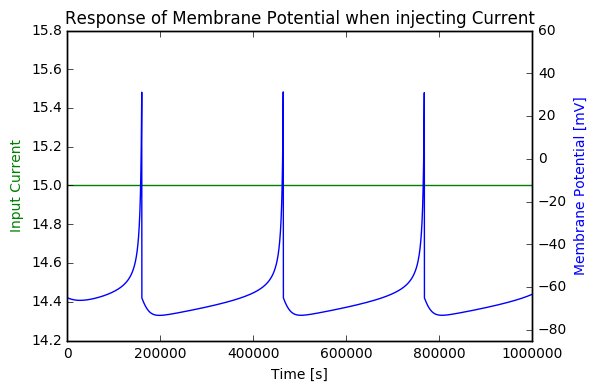

In [5]:
# regular spiking
a = 0.02
b = 0.2
c = -65
d = 8

v = simulate(dt,n_steps,a,b,c,d,u,v,I_in)
plot_firing_behavior(v)

## Tonic bursting/ Chattering

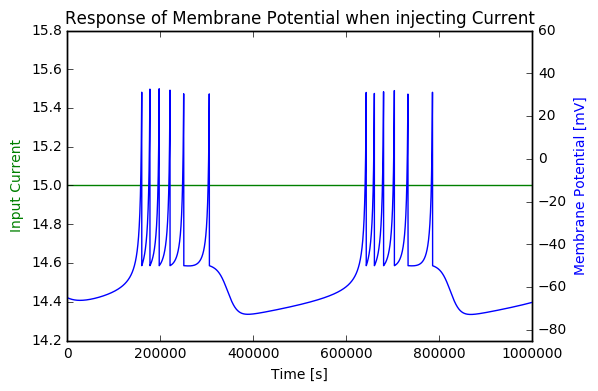

In [6]:
# regular spiking
a = 0.02
b = 0.2
c = -50
d = 2

v = simulate(dt,n_steps,a,b,c,d,u,v,I_in)
plot_firing_behavior(v)

## Intrinsically Bursting 

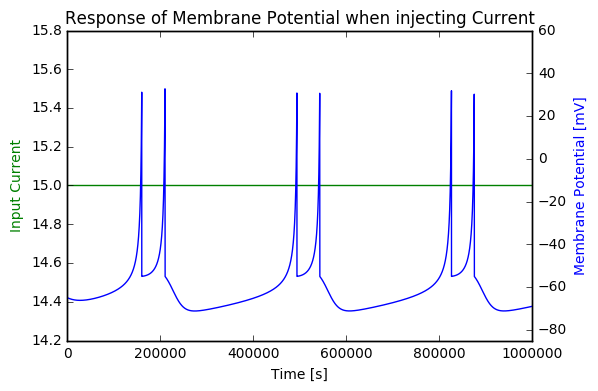

In [7]:
# intrinsically bursting
a = 0.02
b = 0.2
c = -55
d = 4

v = simulate(dt,n_steps,a,b,c,d,u,v,I_in)
plot_firing_behavior(v)

## Fast Spiking (regular behavior of inhibitory cells)

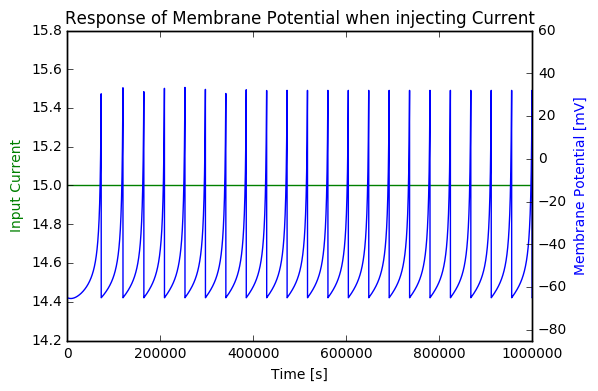

In [8]:
# fast spiking
a = 0.1 # fast recovery
b = 0.2
c = -65
d = 2

v = simulate(dt,n_steps,a,b,c,d,u,v,I_in)
plot_firing_behavior(v)